# Shikari King

## Research question/interests
How do different factors contributing to happiness, such as income, social support, freedom, and corruption, vary across different regions in the world, and how do these regional differences affect overall levels of happiness and life satisfaction?

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import geopandas as gpd
import geoplot as gplt


In [25]:
# Loading the dataframes to be analyzed
# Fixing the name United States
Data2015 = pd.read_csv('../../data/processed/2015_Clean_Data.csv')
Data2016 = pd.read_csv('../../data/processed/2016_Clean_Data.csv')
Data2017 = pd.read_csv('../../data/processed/2017_Clean_Data.csv')
Data2018 = pd.read_csv('../../data/processed/2018_Clean_Data.csv')
Data2019 = pd.read_csv('../../data/processed/2019_Clean_Data.csv')
Data2020 = pd.read_csv('../../data/processed/2020_Clean_Data.csv')
Data2021 = pd.read_csv('../../data/processed/2021_Clean_Data.csv')
Data2022 = pd.read_csv('../../data/processed/2022_Clean_Data.csv')
DataCombine = pd.read_csv('../../data/processed/Overall(No-Year)_Clean_Data.csv')
DataAllYears = pd.read_csv('../../data/processed/Overall(With-year)_Clean_Data.csv')
DataAllRegion = pd.read_csv('../../data/processed/Overall(With-Region-Year)_Clean_Data.csv')

# Fixed the USA as it was named different for GeoPandas
datasets = [Data2015, Data2016, Data2017, Data2018, Data2019, Data2020, Data2021, Data2022, DataCombine, DataAllYears]
for data in datasets:
    data['Country'] = data['Country'].replace('United States', 'United States of America')
datasets = [Data2015, Data2016, Data2017, Data2018, Data2019, Data2020, Data2021, Data2022]
DataAllRegion.columns

Index(['Country', 'Year', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom to make life choices', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Social support',
       'Perceptions of corruption', 'Logged GDP per capita',
       'Healthy life expectancy', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'Dystopia (1.83) + residual',
       'Explained by: GDP per capita'],
      dtype='object')

In [23]:
import sys
sys.path.append('../..')

# Importing Functions to be used
from scripts import project_functions2 as pf

# Pipeline

- Creating Economy vs Region Plot
- Happiness by region chart
- World map showing all of this

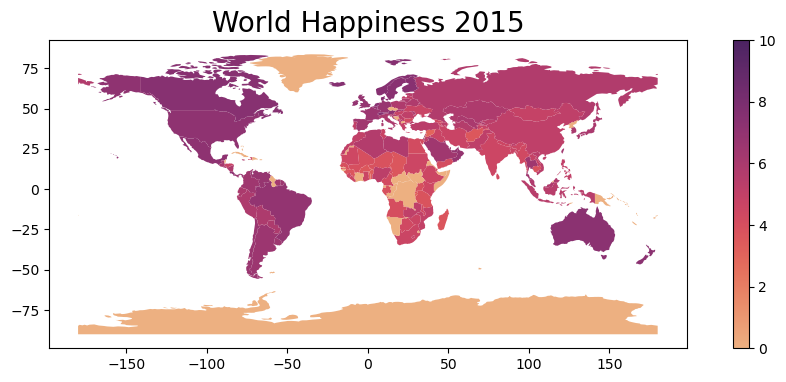

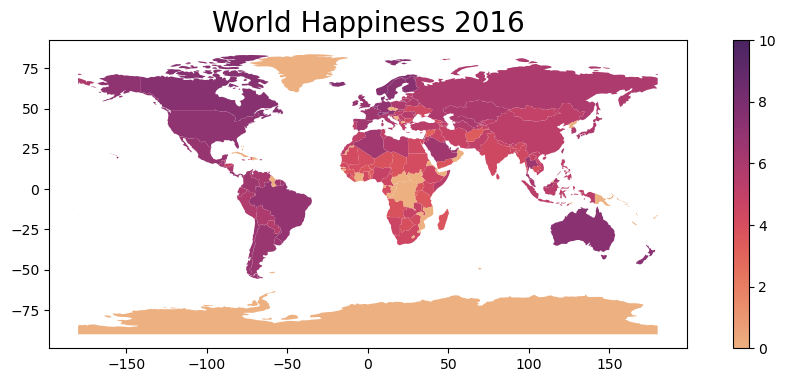

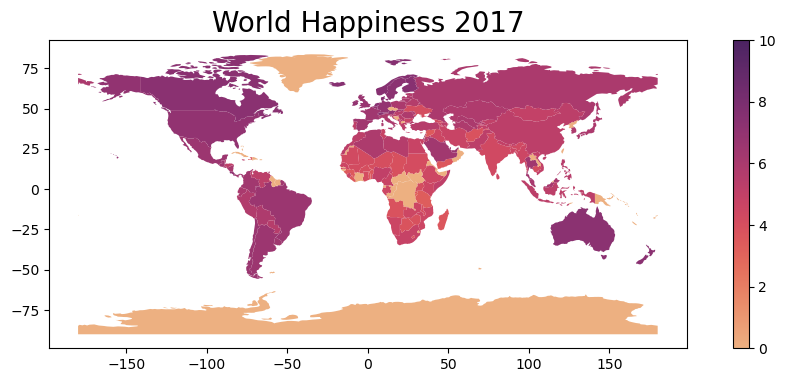

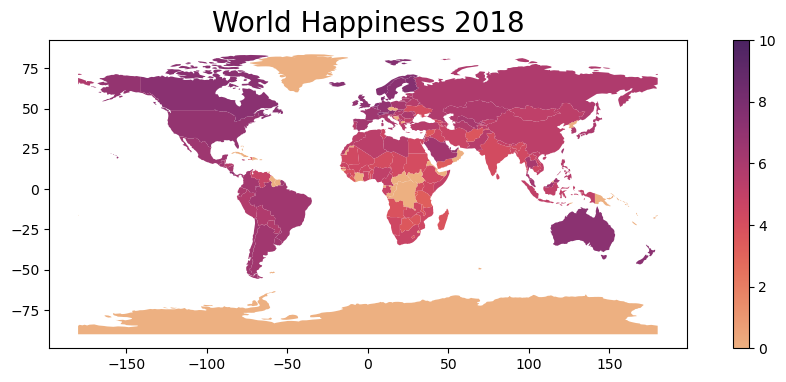

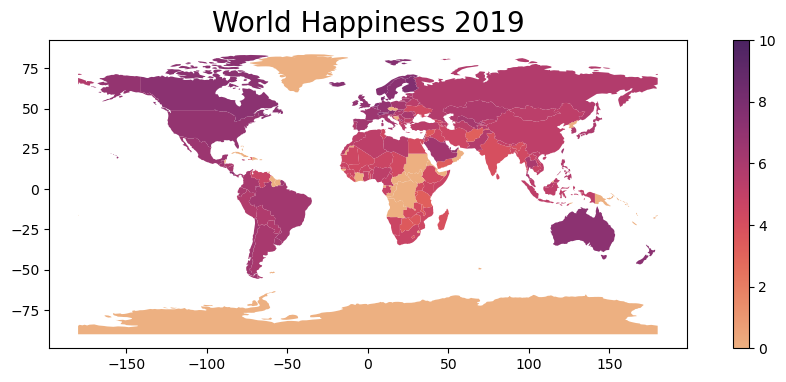

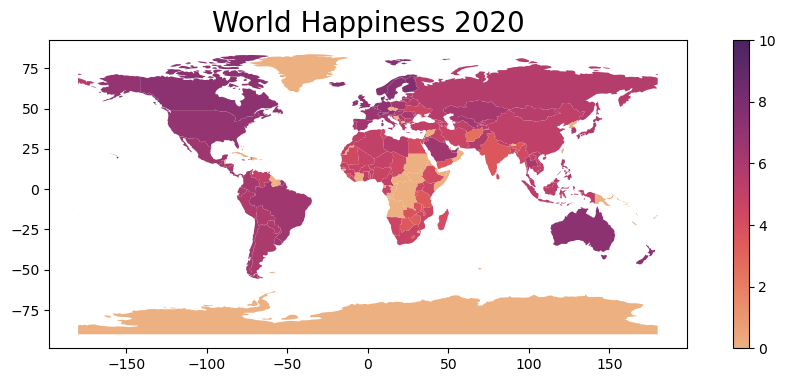

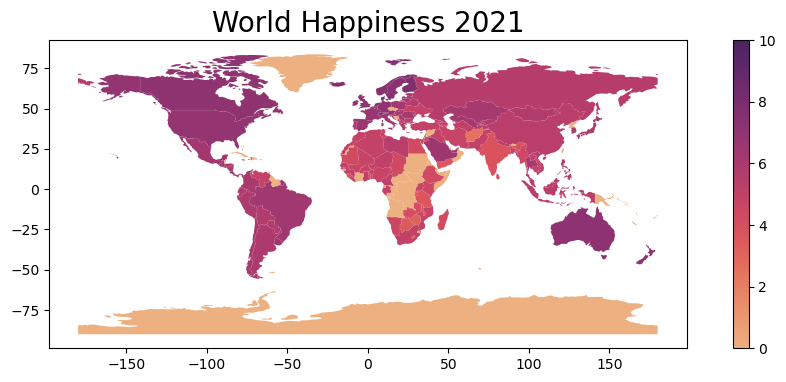

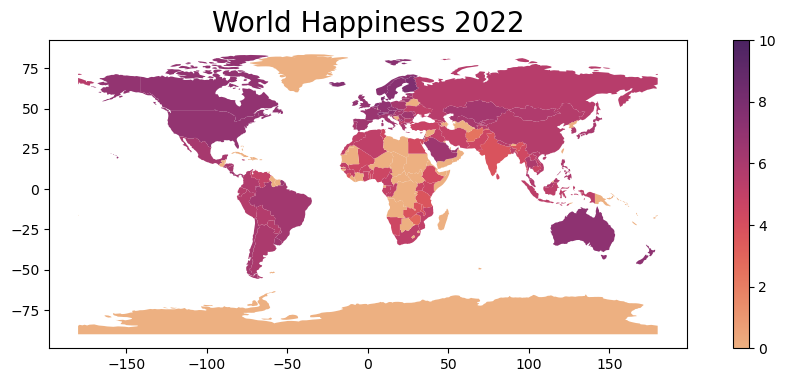

In [24]:
year = 2015
for data in datasets:
    pf.create_world_map_happiness(data,f'World Happiness {year}')
    year += 1

### The above image shows worldwide happiness in 2022 and I want to exlore the reasons as to why some countries are much happier than others

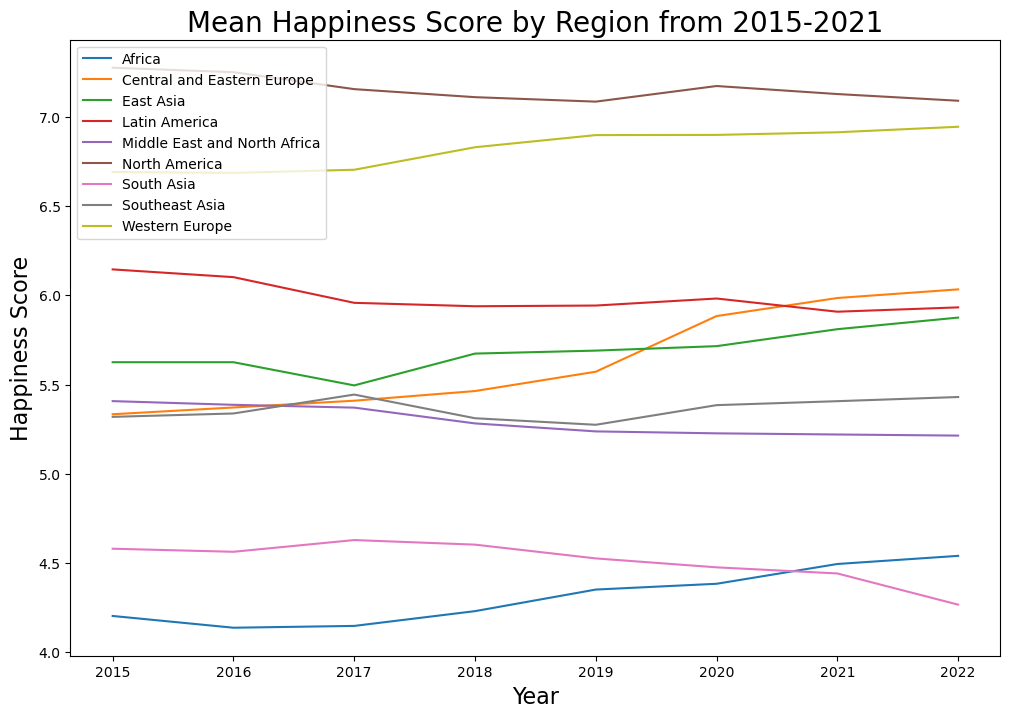

In [13]:
# Create a new dataframe with region-wise average happiness score for each year
region_data = DataAllRegion.groupby(['Year', 'Region'])['Happiness Score'].mean().reset_index()

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

for region in region_data['Region'].unique():
    # Get the data for the current region
    region_subset = region_data[region_data['Region'] == region]
    # Plot the region's data
    ax.plot(region_subset['Year'], region_subset['Happiness Score'], label=region)

# Set the axis labels and title
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Happiness Score', fontsize=16)
ax.set_title('Mean Happiness Score by Region from 2015-2021', fontsize= 20)

# Add a legend
ax.legend()
plt.legend(bbox_to_anchor=(0, 1), loc='upper left')

# Show the plot
plt.show()

 ### Looking at this chart I am seeing the mean happiness over time and some regions different levels of happiness. The images of this happiness was shown above which each year having its own visulization and now I want to dig deeper into the exact GDP, freedom, etc and how this affects the happiness.

### I want to look deeper into Freedom to make life choices and its impact on happiness

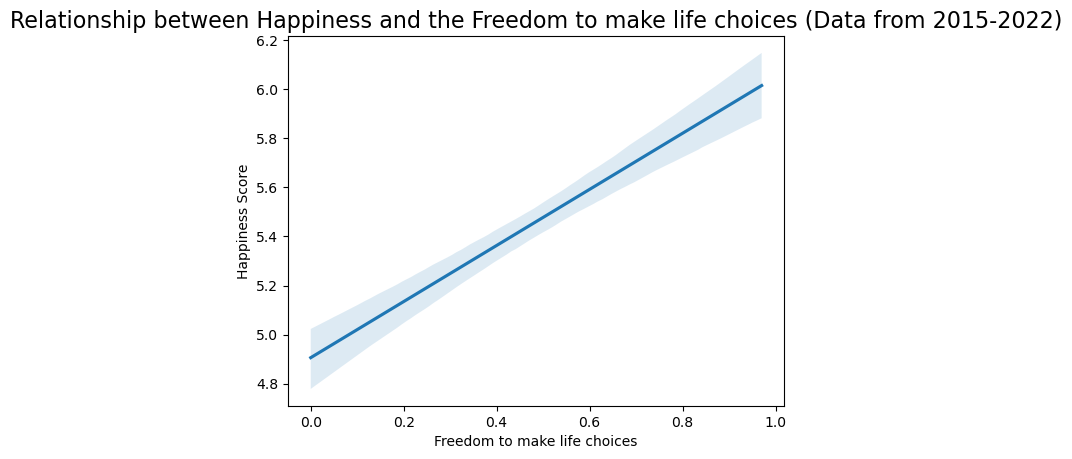

In [33]:
data = DataAllYears

# create scatter plot with regression line
sns.regplot(x='Freedom to make life choices', y='Happiness Score', data=data, scatter=False)

# add labels and title
plt.xlabel('Freedom to make life choices')
plt.ylabel('Happiness Score')
plt.title('Relationship between Happiness and the Freedom to make life choices (Data from 2015-2022)', fontsize=16)

# show plot
plt.show()

### Looking at this correlation map there is clear correlation between Freedom to Make Life choices and the level of Happiness that an area has

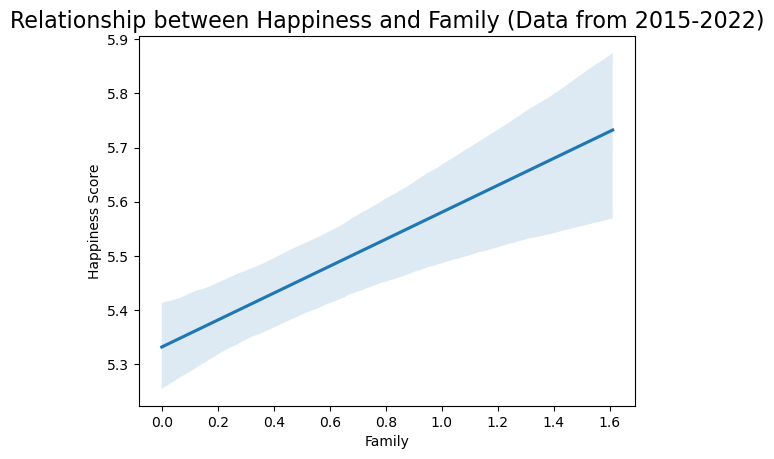

In [40]:
data = DataAllYears

# create scatter plot with regression line
sns.regplot(x='Family', y='Happiness Score', data=data, x_estimator=np.mean, scatter=False)

# add labels and title
plt.xlabel('Family')
plt.ylabel('Happiness Score')
plt.title('Relationship between Happiness and Family (Data from 2015-2022)', fontsize=16)

# show plot
plt.show()

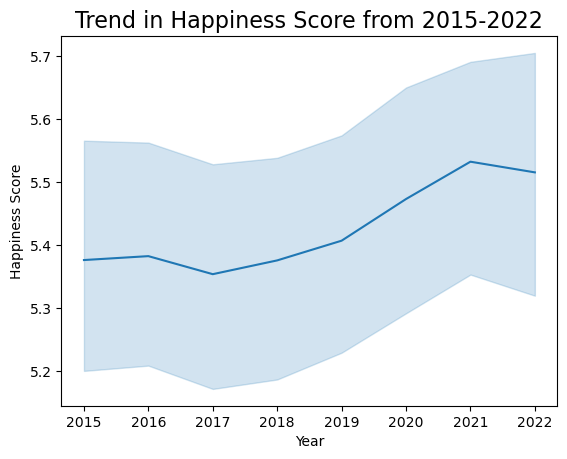

In [41]:
# create line plot
sns.lineplot(x='Year', y='Happiness Score', data=DataAllYears)

# add labels and title
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.title('Trend in Happiness Score from 2015-2022', fontsize=16)

# show plot
plt.show()

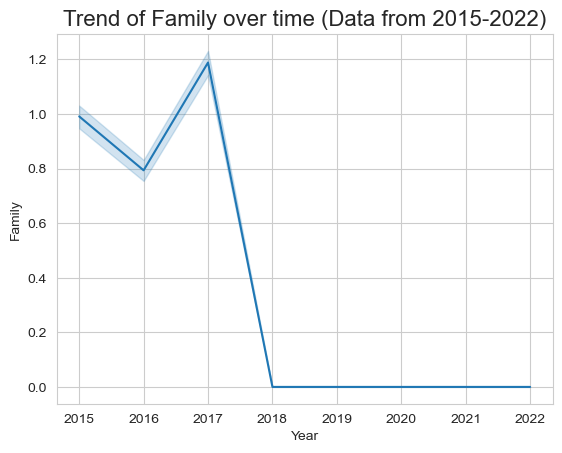

In [43]:
# set style
sns.set_style("whitegrid")

# create line plot
sns.lineplot(x='Year', y='Family', data=DataAllYears)

# add labels and title
plt.xlabel('Year')
plt.ylabel('Family')
plt.title('Trend of Family over time (Data from 2015-2022)', fontsize=16)

# show plot
plt.show()